# Trying New Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

### Reading df

### Clean Data  

In [347]:
def change_col_name(df, col:int):
    cell_name = col - ((col-2) % 4)
    df.iloc[1,col] = df.iloc[0,cell_name] + '_' + df.iloc[1,col]
    return cell_name

In [ ]:
GENE_AXIS = 0
SAMPLE_AXIS = 1

# Reading the data
raw_df = pd.read_csv('ASE-HYBRID.csv', header=None, skiprows=[1,2] )

# Removing first 16 columns
raw_df = raw_df.iloc[:,16:-1]

samples = raw_df.iloc[0].dropna().values

# Renaming the columns
for i in range(2,raw_df.shape[1]):
    change_col_name(raw_df, i)
raw_df.columns = raw_df.iloc[1,:]

# Removing the first two rows
raw_df = raw_df.drop([0,1])
ambig_cols = [col for col in raw_df.columns if 'ambig' in col]
raw_df = raw_df.drop(columns=ambig_cols+['chrom'])
raw_df.index = raw_df['gene']
raw_df = raw_df[np.logical_not(raw_df.index.duplicated(keep="first"))]  # Keep only the first occurrence

raw_df = raw_df.drop(columns=['gene'])
raw_df

C:\Users\wmata\AppData\Local\Temp\ipykernel_21628\2378993731.py:6: DtypeWarning: Columns (0,1,8,9,10,11,12,13,14,15,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_df = pd.read_csv('ASE-HYBRID.csv', header=None, skiprows=[1,2] )


1,HL1-25_1_ref_counts,HL1-25_1_alt_counts,HL1-25_1_no_ase_counts,HL1-25_2_ref_counts,HL1-25_2_alt_counts,HL1-25_2_no_ase_counts,HL1-29_1_ref_counts,HL1-29_1_alt_counts,HL1-29_1_no_ase_counts,HL1-29_2_ref_counts,...,CNCC_H20961_3_no_ase_counts,CNCC_C3649_1_ref_counts,CNCC_C3649_1_alt_counts,CNCC_C3649_1_no_ase_counts,CNCC_C3649_2_ref_counts,CNCC_C3649_2_alt_counts,CNCC_C3649_2_no_ase_counts,CNCC_C3649_3_ref_counts,CNCC_C3649_3_alt_counts,CNCC_C3649_3_no_ase_counts
gene,,,,,,,,,,,,,,,,,,,,,
3.8-1.2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3.8-1.4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3.8-1.5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5-HT3C2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A1BG,39,70,59,65,92,104,50,79,75,58,...,98,0,111,60,0,177,80,0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11B,450,753,888,535,980,1058,418,713,831,462,...,1112,0,338,464,0,691,867,1,1215,1039
ZYX,3917,4570,1618,6926,8019,3712,3901,4161,1727,5462,...,1300,4,1254,464,6,2344,704,4,250,124
ZZEF1,552,423,617,703,549,818,456,403,505,681,...,984,2,638,584,2,1066,989,2,941,730


In [349]:
raw_df = raw_df.astype(float)
raw_df

1,HL1-25_1_ref_counts,HL1-25_1_alt_counts,HL1-25_1_no_ase_counts,HL1-25_2_ref_counts,HL1-25_2_alt_counts,HL1-25_2_no_ase_counts,HL1-29_1_ref_counts,HL1-29_1_alt_counts,HL1-29_1_no_ase_counts,HL1-29_2_ref_counts,...,CNCC_H20961_3_no_ase_counts,CNCC_C3649_1_ref_counts,CNCC_C3649_1_alt_counts,CNCC_C3649_1_no_ase_counts,CNCC_C3649_2_ref_counts,CNCC_C3649_2_alt_counts,CNCC_C3649_2_no_ase_counts,CNCC_C3649_3_ref_counts,CNCC_C3649_3_alt_counts,CNCC_C3649_3_no_ase_counts
gene,,,,,,,,,,,,,,,,,,,,,
3.8-1.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3.8-1.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3.8-1.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5-HT3C2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A1BG,39.0,70.0,59.0,65.0,92.0,104.0,50.0,79.0,75.0,58.0,...,98.0,0.0,111.0,60.0,0.0,177.0,80.0,0.0,1.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11B,450.0,753.0,888.0,535.0,980.0,1058.0,418.0,713.0,831.0,462.0,...,1112.0,0.0,338.0,464.0,0.0,691.0,867.0,1.0,1215.0,1039.0
ZYX,3917.0,4570.0,1618.0,6926.0,8019.0,3712.0,3901.0,4161.0,1727.0,5462.0,...,1300.0,4.0,1254.0,464.0,6.0,2344.0,704.0,4.0,250.0,124.0
ZZEF1,552.0,423.0,617.0,703.0,549.0,818.0,456.0,403.0,505.0,681.0,...,984.0,2.0,638.0,584.0,2.0,1066.0,989.0,2.0,941.0,730.0


In [350]:
print("Shape before filtering:", raw_df.shape)
DATA_FRAME = raw_df[raw_df.gt(50).any(axis=1)]
print("Shape after filtering:", DATA_FRAME.shape)
DATA_FRAME


Shape before filtering: (45946, 93)
Shape after filtering: (18792, 93)


1,HL1-25_1_ref_counts,HL1-25_1_alt_counts,HL1-25_1_no_ase_counts,HL1-25_2_ref_counts,HL1-25_2_alt_counts,HL1-25_2_no_ase_counts,HL1-29_1_ref_counts,HL1-29_1_alt_counts,HL1-29_1_no_ase_counts,HL1-29_2_ref_counts,...,CNCC_H20961_3_no_ase_counts,CNCC_C3649_1_ref_counts,CNCC_C3649_1_alt_counts,CNCC_C3649_1_no_ase_counts,CNCC_C3649_2_ref_counts,CNCC_C3649_2_alt_counts,CNCC_C3649_2_no_ase_counts,CNCC_C3649_3_ref_counts,CNCC_C3649_3_alt_counts,CNCC_C3649_3_no_ase_counts
gene,,,,,,,,,,,,,,,,,,,,,
A1BG,39.0,70.0,59.0,65.0,92.0,104.0,50.0,79.0,75.0,58.0,...,98.0,0.0,111.0,60.0,0.0,177.0,80.0,0.0,1.0,4.0
A1BG-AS1,40.0,49.0,8.0,68.0,66.0,11.0,46.0,49.0,8.0,33.0,...,10.0,0.0,38.0,4.0,0.0,53.0,7.0,0.0,59.0,1.0
A1CF,0.0,0.0,6.0,0.0,0.0,4.0,0.0,0.0,6.0,0.0,...,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
A2M,1.0,13.0,6.0,21.0,40.0,51.0,3.0,11.0,11.0,4.0,...,3642.0,6.0,143.0,154.0,6.0,243.0,220.0,5.0,5.0,8.0
A2ML1,129.0,50.0,57.0,101.0,33.0,62.0,178.0,37.0,94.0,106.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11B,450.0,753.0,888.0,535.0,980.0,1058.0,418.0,713.0,831.0,462.0,...,1112.0,0.0,338.0,464.0,0.0,691.0,867.0,1.0,1215.0,1039.0
ZYX,3917.0,4570.0,1618.0,6926.0,8019.0,3712.0,3901.0,4161.0,1727.0,5462.0,...,1300.0,4.0,1254.0,464.0,6.0,2344.0,704.0,4.0,250.0,124.0
ZZEF1,552.0,423.0,617.0,703.0,549.0,818.0,456.0,403.0,505.0,681.0,...,984.0,2.0,638.0,584.0,2.0,1066.0,989.0,2.0,941.0,730.0


### Parse the sample types

In [ ]:
HYBRIDS_SAMPLES = set([s for s in DATA_FRAME.columns if 'HL' in s])
non_hybrid = set(DATA_FRAME.columns) - HYBRIDS_SAMPLES
HUMAN_SAMPLES = set([s for s in non_hybrid if 'H' in s])
CHIMP_SAMPLES = non_hybrid - HUMAN_SAMPLES
REF_COUNT = set([s for s in DATA_FRAME.columns if 'ref' in s])
ALT_COUNT = set([s for s in DATA_FRAME.columns if 'alt' in s])
NO_ASE_COUNT = set([s for s in DATA_FRAME.columns if 'no_ase' in s])
CNCC = set([s for s in DATA_FRAME.columns if 'CNCC' in s])
IPSC = set(DATA_FRAME.columns) - CNCC


def intersect(list_of_categories):
    """This function takes a list of categories and returns the intersection of the samples that belong to those categories"""
    return list(set.intersection(*list_of_categories))





### Normalize Into Counts per Million

In [352]:
normalized_df = pd.DataFrame(index=DATA_FRAME.index)

COLUMNS_PER_SAMPLE = 3
for i in range(0, DATA_FRAME.shape[1], COLUMNS_PER_SAMPLE):
    sample_window = DATA_FRAME.iloc[:, i:i + COLUMNS_PER_SAMPLE]
    total_sample_counts = sample_window.sum()
    normalized_df[sample_window.columns] = (float(1e6) * sample_window / total_sample_counts).astype(float)

normalized_df

,HL1-25_1_ref_counts,HL1-25_1_alt_counts,HL1-25_1_no_ase_counts,HL1-25_2_ref_counts,HL1-25_2_alt_counts,HL1-25_2_no_ase_counts,HL1-29_1_ref_counts,HL1-29_1_alt_counts,HL1-29_1_no_ase_counts,HL1-29_2_ref_counts,...,CNCC_H20961_3_no_ase_counts,CNCC_C3649_1_ref_counts,CNCC_C3649_1_alt_counts,CNCC_C3649_1_no_ase_counts,CNCC_C3649_2_ref_counts,CNCC_C3649_2_alt_counts,CNCC_C3649_2_no_ase_counts,CNCC_C3649_3_ref_counts,CNCC_C3649_3_alt_counts,CNCC_C3649_3_no_ase_counts
gene,,,,,,,,,,,,,,,,,,,,,
A1BG,4.267606,7.355033,3.363000,5.463278,7.425634,4.067855,5.778599,8.971259,4.255218,5.627461,...,5.544508,0.000000,16.718114,7.055807,0.000000,14.673530,5.572225,0.000000,0.095776,0.339094
A1BG-AS1,4.377031,5.148523,0.456000,5.715429,5.327085,0.430254,5.316311,5.564452,0.453890,3.201831,...,0.565766,0.000000,5.723318,0.470387,0.000000,4.393769,0.487570,0.000000,5.650810,0.084773
A1CF,0.000000,0.000000,0.342000,0.000000,0.000000,0.156456,0.000000,0.000000,0.340417,0.000000,...,0.735496,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.084773
A2M,0.109426,1.365935,0.342000,1.765059,3.228536,1.994814,0.346716,1.249163,0.624099,0.388101,...,206.052035,400.507309,21.537750,18.109905,409.836066,20.145016,15.323618,300.174101,0.478882,0.678187
A2ML1,14.115926,5.253595,3.249000,8.489093,2.663543,2.425068,20.571813,4.201729,5.333206,10.284670,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.095776,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11B,49.241603,79.119136,50.615999,44.966977,79.099141,41.382605,48.309089,80.968451,47.147810,44.825637,...,62.913197,0.000000,50.907410,54.564907,0.000000,57.284798,60.388984,60.034820,116.368376,88.079540
ZYX,428.620795,480.178555,92.225998,582.133233,647.240832,145.191142,450.846311,472.524157,97.983475,529.951579,...,73.549600,267.004873,188.869502,54.564907,409.836066,194.320647,49.035577,240.139281,23.944110,10.511899
ZZEF1,60.403033,44.445411,35.168999,59.087448,44.311662,31.995246,52.700825,45.764777,28.651798,66.074153,...,55.671390,133.502436,96.091501,68.676521,136.612022,88.372786,68.886627,120.069640,90.125631,61.884566


### Find Genes with Similar Distribution  in Both Hybrid and Parenthal Samples

In [354]:
from scipy.stats import ttest_ind, mannwhitneyu

def get_p_values(gene):
    human_h_values = normalized_df.loc[gene, intersect([HUMAN_SAMPLES, REF_COUNT, IPSC])]
    hybrid_h_vlaues = normalized_df.loc[gene, intersect([HYBRIDS_SAMPLES, REF_COUNT, IPSC])]
    hybrid_c_values = normalized_df.loc[gene, intersect([HYBRIDS_SAMPLES, ALT_COUNT, IPSC])]
    chimp_c_values = normalized_df.loc[gene, intersect([CHIMP_SAMPLES, ALT_COUNT, IPSC])]
    
    # t_stat_ttest, p_value_two_tailed_ttest = ttest_ind(disease_values, healthy_values, equal_var=False)
    # _, p_val_ttest = ttest_ind(human_h_values, hybrid_h_vlaues, equal_var=False, alternative='two-sided')
    _, p_val_wilcoxon_hybrid_human = mannwhitneyu(human_h_values, hybrid_h_vlaues, alternative='two-sided')
    _, p_val_wilcoxon_hybrid_chimp = mannwhitneyu(hybrid_c_values, chimp_c_values, alternative='two-sided')
    _, p_val_ttest_hybrid_human = ttest_ind(human_h_values, hybrid_h_vlaues, equal_var=False, alternative='two-sided')
    _, p_val_ttest_hybrid_chimp = ttest_ind(hybrid_c_values, chimp_c_values, equal_var=False, alternative='two-sided')
    return{ 
            'p_val_wilcoxon_hybrid_human': p_val_wilcoxon_hybrid_human,
            'p_val_wilcoxon_hybrid_chimp': p_val_wilcoxon_hybrid_chimp,
            'p_val_ttest_hybrid_human': p_val_ttest_hybrid_human,
            'p_val_ttest_hybrid_chimp': p_val_ttest_hybrid_chimp
            }


p_values = pd.DataFrame(index=normalized_df.index, columns=['p_val_wilcoxon_hybrid_human', 'p_val_wilcoxon_hybrid_chimp',
                                                  'p_val_ttest_hybrid_human', 'p_val_ttest_hybrid_chimp'])
for gene in normalized_df.index: 
    p_values.loc[gene] = get_p_values(gene)


In [ ]:
p_val_threshold = 0.95

print('---------------------------------')
print('\tWilcoxon test results')
print("Hybrid && Human Genes:\t", (p_values.loc[:,'p_val_wilcoxon_hybrid_human'] > p_val_threshold).sum())
print("Hybrid && Chimp Genes:\t", (p_values.loc[:,'p_val_wilcoxon_hybrid_chimp'] > p_val_threshold).sum())
high_p_values_wilcoxon = np.logical_and(p_values.loc[:, 'p_val_wilcoxon_hybrid_human'] > p_val_threshold, p_values.loc[:, 'p_val_wilcoxon_hybrid_chimp'] > p_val_threshold)
print("Both:\t\t\t", high_p_values_wilcoxon.sum())

print('---------------------------------')
print('\tT-test results')
print("Hybrid && Human Genes:\t", (p_values.loc[:,'p_val_ttest_hybrid_human'] > p_val_threshold).sum())
print("Hybrid && Chimp Genes:\t", (p_values.loc[:,'p_val_ttest_hybrid_chimp'] > p_val_threshold).sum())
high_p_values_ttest = np.logical_and(p_values.loc[:, 'p_val_ttest_hybrid_human'] > p_val_threshold, p_values.loc[:, 'p_val_ttest_hybrid_chimp'] > p_val_threshold)
print("Both:\t\t\t", high_p_values_ttest.sum())
print('---------------------------------')

wilcoxon_equivalent_genes = normalized_df.index[high_p_values_wilcoxon]
wilcoxon_equivalent_genes

---------------------------------
	Wilcoxon test results
Hybrid && Human Genes:	 2602
Hybrid && Chimp Genes:	 2645
Both:			 1412
---------------------------------
	T-test results
Hybrid && Human Genes:	 411
Hybrid && Chimp Genes:	 412
Both:			 12
---------------------------------


Index(['ABCC2', 'ABCC6P2', 'ABHD17AP1', 'ABHD17AP6', 'ACADM', 'ACAN', 'ACOD1',
       'ACOX3', 'ACTBP11', 'ACTBP2',
       ...
       'ZNF624', 'ZNF658', 'ZNF658B', 'ZNF672', 'ZNF676', 'ZNF692', 'ZNF807',
       'ZNF812P', 'ZSWIM7', 'bA395L14.12'],
      dtype='object', name='gene', length=1412)

TOST - Two One Sided Test - Trying to find genes with consistant distribution 

In [ ]:

def tost_test(gene, epsilon):
    human_h_values = normalized_df.loc[gene, intersect([HUMAN_SAMPLES, REF_COUNT, IPSC])]
    hybrid_h_vlaues = normalized_df.loc[gene, intersect([HYBRIDS_SAMPLES, REF_COUNT, IPSC])]
    hybrid_c_values = normalized_df.loc[gene, intersect([HYBRIDS_SAMPLES, ALT_COUNT, IPSC])]
    chimp_c_values = normalized_df.loc[gene, intersect([CHIMP_SAMPLES, ALT_COUNT, IPSC])]

    _, lower_bound_p_val_hybrid_human = mannwhitneyu(human_h_values, hybrid_h_vlaues - epsilon, alternative='greater')
    _, upper_bound_p_val_hybrid_human = mannwhitneyu(human_h_values, hybrid_h_vlaues + epsilon, alternative='less')
    _, lower_bound_p_val_hybrid_chimp = mannwhitneyu(hybrid_c_values, chimp_c_values - epsilon, alternative='greater')
    _, upper_bound_p_val_hybrid_chimp = mannwhitneyu(hybrid_c_values, chimp_c_values + epsilon, alternative='less')

    return {
        'lower_bound_p_val_hybrid_human': lower_bound_p_val_hybrid_human,
        'upper_bound_p_val_hybrid_human': upper_bound_p_val_hybrid_human,
        'lower_bound_p_val_hybrid_chimp': lower_bound_p_val_hybrid_chimp,
        'upper_bound_p_val_hybrid_chimp': upper_bound_p_val_hybrid_chimp,
    }


tost_p_values = pd.DataFrame(index=wilcoxon_equivalent_genes, columns=['lower_bound_p_val_hybrid_human', 
                                                                    'upper_bound_p_val_hybrid_human', 
                                                                    'lower_bound_p_val_hybrid_chimp',
                                                                    'upper_bound_p_val_hybrid_chimp'
                                                                    ])
for gene in normalized_df.index: 
    tost_p_values.loc[gene] = tost_test(gene, epsilon=0.5)




C:\Users\wmata\AppData\Local\Temp\ipykernel_21628\4033578719.py:26: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  tost_p_values.loc[gene] = tost_test(gene, epsilon=0.5)


In [360]:
human_hybrid_tost_equivalence = np.maximum(tost_p_values['lower_bound_p_val_hybrid_human'], tost_p_values['upper_bound_p_val_hybrid_human']) < 0.05
chimp_hybrid_tost_equivalence = np.maximum(tost_p_values['lower_bound_p_val_hybrid_chimp'], tost_p_values['upper_bound_p_val_hybrid_chimp']) < 0.05

print('---------------------------------')
print('\tTOST test results')
print("Hybrid && Human Genes:\t", human_hybrid_tost_equivalence.sum())
print("Hybrid && Chimp Genes:\t", chimp_hybrid_tost_equivalence.sum())
tost_equivalent_genes = normalized_df.index[np.logical_and(human_hybrid_tost_equivalence, chimp_hybrid_tost_equivalence)]
print('Both:\t\t\t', tost_equivalent_genes.shape[0])
print('---------------------------------')


---------------------------------
	TOST test results
Hybrid && Human Genes:	 3253
Hybrid && Chimp Genes:	 3268
Both:			 2737
---------------------------------


### Compare Hybrid Expression to Parental Expression
This is to filter out genes that get too messy with the the tetraploidism

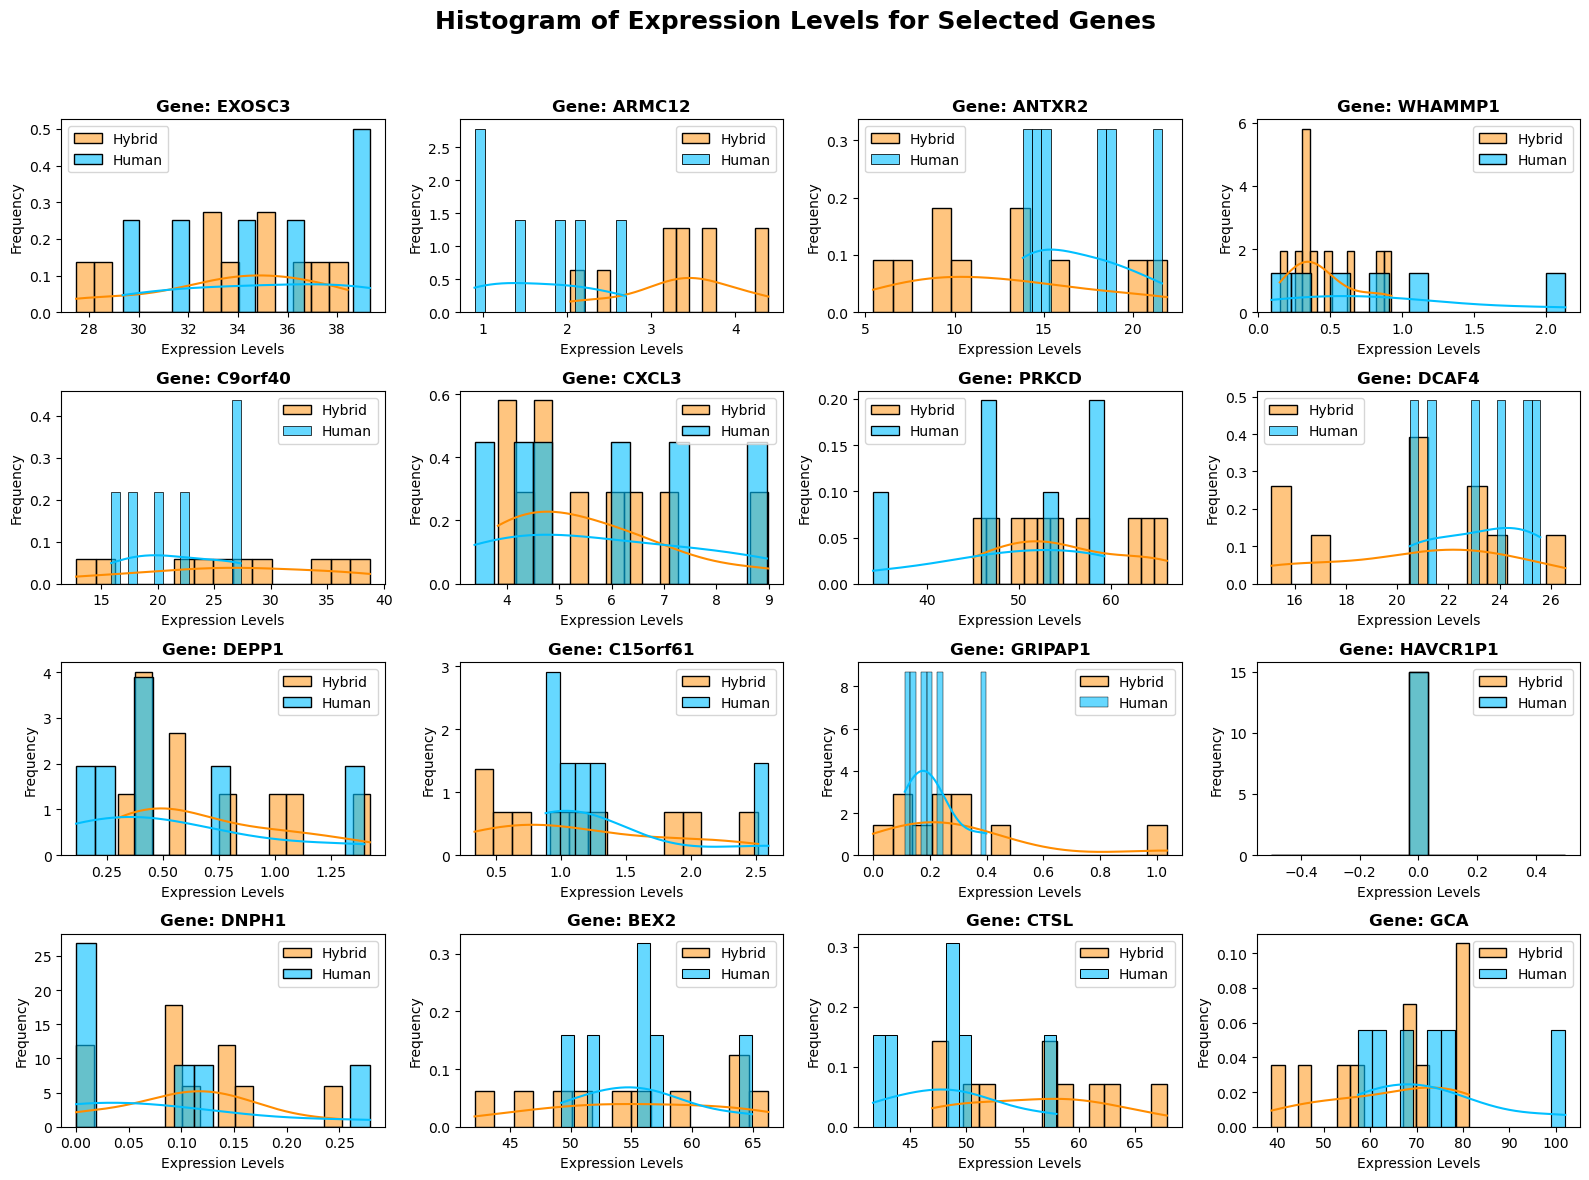

In [378]:
# Set random seed for reproducibility
np.random.seed(1099)

SAMPLE_AMOUNT = 16
selected_genes = np.random.choice(tost_equivalent_genes, min(SAMPLE_AMOUNT, len(tost_equivalent_genes)), replace=False)

# Define colors
hybrid_h = 'darkorange'
parental_h = 'deepskyblue'

# Create subplots
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(16, 12))
fig.suptitle('Histogram of Expression Levels for Selected Genes', fontsize=18, fontweight='bold')
axes = axes.flatten()

# Plot histograms for each gene
for i, gene in enumerate(selected_genes):
    ax = axes[i]

    # Extract expression values
    df_hybrid_h_ipsc = normalized_df.loc[gene, intersect([IPSC, HYBRIDS_SAMPLES, REF_COUNT])]
    df_human_h_ipsc = normalized_df.loc[gene, intersect([IPSC, HUMAN_SAMPLES, REF_COUNT])]

    # Plot using seaborn histplot for better visualization
    sns.histplot(df_hybrid_h_ipsc, bins=15, kde=True, alpha=0.5, color=hybrid_h, label='Hybrid', ax=ax, stat="density")
    sns.histplot(df_human_h_ipsc, bins=15, kde=True, alpha=0.6, color=parental_h, label='Human', ax=ax, stat="density")

    ax.set_xlabel('Expression Levels')
    ax.set_ylabel('Frequency')
    ax.set_title(f'Gene: {gene}', fontsize=12, fontweight='bold')

    ax.legend()

# Hide empty subplots (if less than 20 genes)
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
fig.tight_layout(rect=[0, 0, 1, 0.95])

# Show the plot
plt.show()
